### Complete Practical Time Series Analysis
- Module: Linear Regression
- [Udemy](www.datascienceanywhere.com/udemy/timeseriesforecast)

In [1]:
from google.colab import drive
drive.mount('drive/')

ModuleNotFoundError: No module named 'google'

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# setting path
os.chdir('drive/My Drive/Complete_time_series/Regression')

In [ ]:
ls

 data/  'Linear Regression.ipynb'


# Exploratory Data Analysis

In [ ]:
df = pd.read_excel('data/regression_data.xlsx')
df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


## Quantitative Technique
- Central Tendencies
- Measure of Spread

In [ ]:
# shape
df.shape

(27, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       27 non-null     float64
 1   y       27 non-null     float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [ ]:
print(df.mean())
print(df.median())
print(df.mode())

x    2.236667
y    6.070000
dtype: float64
x    2.18
y    3.20
dtype: float64
      x    y
0  1.85  1.7
1  2.18  2.4


In [ ]:
# measure of spread
# variance of the 
print(df.var())
print(df.std())

x     0.714815
y    24.310415
dtype: float64
x    0.845468
y    4.930559
dtype: float64


In [ ]:
# describe
df.describe()

,x,y
count,27.000000,27.000000
mean,2.236667,6.070000
std,0.845468,4.930559
min,1.200000,1.200000
25%,1.730000,2.300000
50%,2.180000,3.200000
75%,2.520000,9.470000
max,4.600000,17.800000


### Graphical Method

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


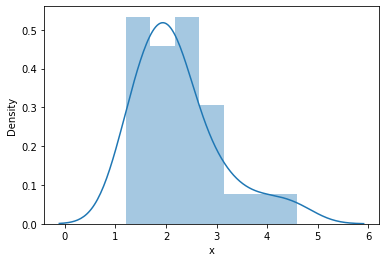

In [ ]:
sns.distplot(df['x'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


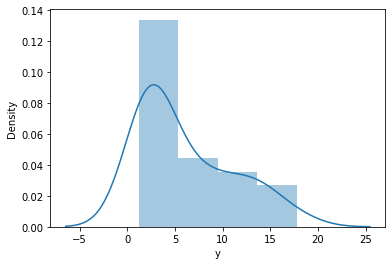

In [ ]:
sns.distplot(df['y'])

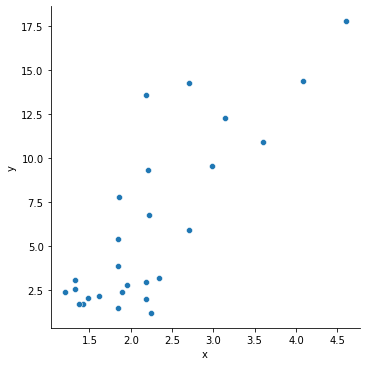

In [ ]:
# relationship plot
sns.relplot(x='x',y='y',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


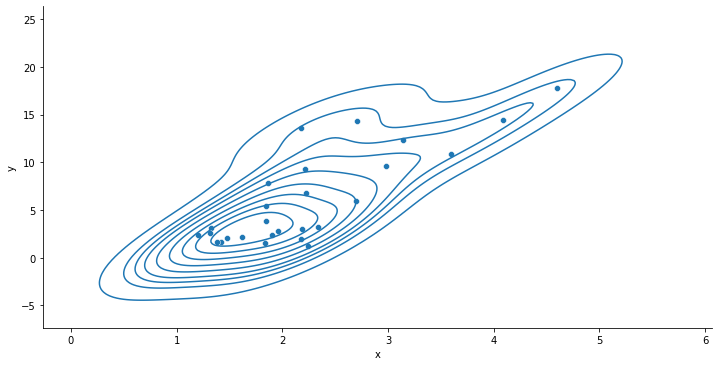

In [ ]:
sns.relplot(x='x',y='y',data=df,aspect=2)
sns.kdeplot(df['x'],df['y'])

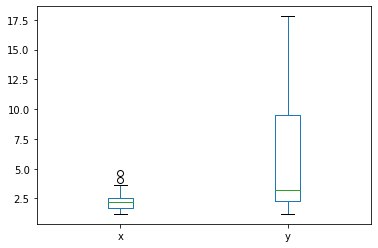

In [ ]:
df.plot(kind='box')

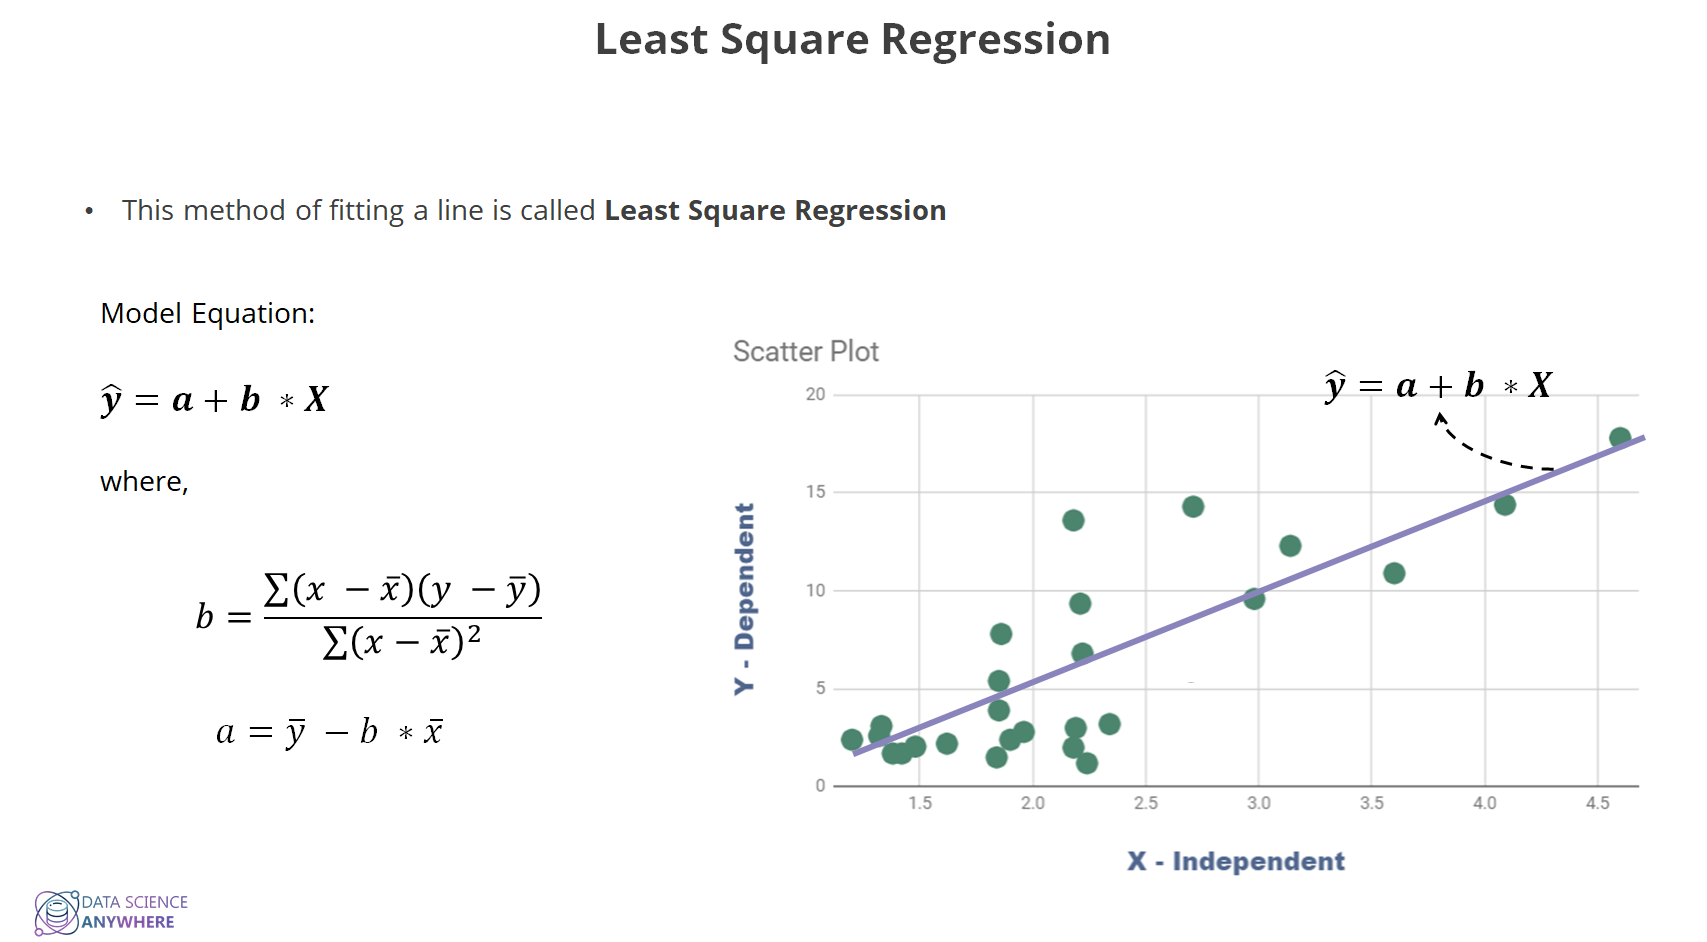

In [ ]:
df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


In [ ]:
# slope of the line b
# b = cov(x,y) / var(x)
cov = df.cov()
cov

,x,y
x,0.714815,3.390746
y,3.390746,24.310415


In [ ]:
b = cov['x']['y'] / cov['x']['x']
print('Slope of the line =',b) 

Slope of the line = 4.743527107590986


In [ ]:
# intercept of the line a
# a = mean(y) - b * mean(x)
a = df['y'].mean() - b * df['x'].mean()
print('Intercept of the line = ',a)

Intercept of the line =  -4.539688963978507


In [ ]:
def model_equation(x):
  y_hat = a + b * x
  return y_hat

In [ ]:
model_equation(3)

9.690892358794454

In [ ]:
y_pred = model_equation(df['x'])

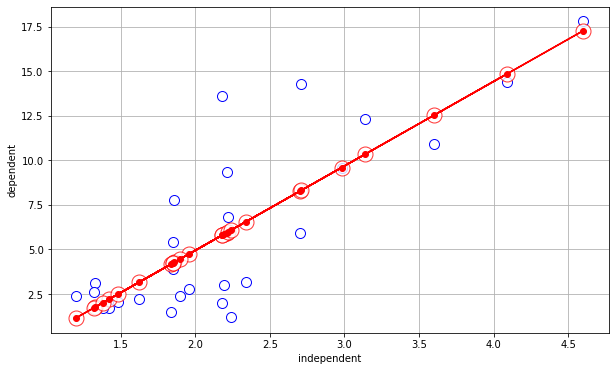

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'bo',markersize=10,markerfacecolor='w')
# linear regression line
plt.plot(df['x'],y_pred,'ro',markersize=15,markerfacecolor='w',alpha=0.8)
plt.plot(df['x'],y_pred,'r')
plt.plot(df['x'],y_pred,'ro')


plt.xlabel('independent')
plt.ylabel('dependent')
plt.grid()
plt.show()

### Linear Regression with Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


In [ ]:
X = df.iloc[:,:-1].values # converting to array
y = df.iloc[:,-1].values 

X.shape,y.shape

((27, 1), (27,))

In [ ]:
model = LinearRegression()
model.fit(X,y)
print('Model trained or fitted sucessfully')

Model trained or fitted sucessfully


In [ ]:
# intercept , slope
model.intercept_ , model.coef_ 

(-4.539688963978512, array([4.74352711]))

In [ ]:
# prediction
y_pred_sk = model.predict(X)

In [ ]:
test = np.array([3]).reshape(-1,1)

model.predict(test)

array([9.69089236])

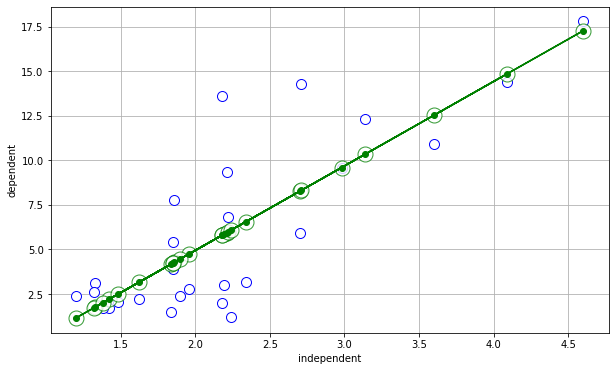

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'bo',markersize=10,markerfacecolor='w')
# linear regression line
plt.plot(df['x'],y_pred_sk,'go',markersize=15,markerfacecolor='w',alpha=0.8)
plt.plot(df['x'],y_pred_sk,'g')
plt.plot(df['x'],y_pred_sk,'go')


plt.xlabel('independent')
plt.ylabel('dependent')
plt.grid()
plt.show()

### Linear Regression with Statsmodel

In [ ]:
# OLS
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


In [ ]:
# linear regression : oridinary least square regression (OLS)
model_sm = sm.OLS.from_formula(formula='y~x',data=df).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           2.50e-07
Time:                        05:45:24   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5397      1.619     -2.805      0.0

In [ ]:
test_data = pd.DataFrame([[3]],columns=['x'])
model_sm.predict(test_data)

0    9.690892
dtype: float64

In [ ]:
fittedvalue = model_sm.fittedvalues

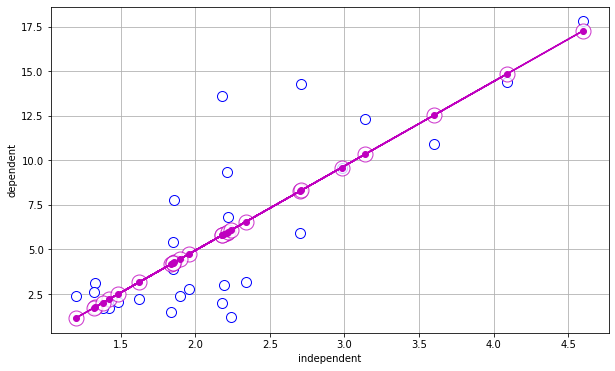

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'bo',markersize=10,markerfacecolor='w')
# linear regression line
plt.plot(df['x'],fittedvalue,'mo',markersize=15,markerfacecolor='w',alpha=0.8)
plt.plot(df['x'],fittedvalue,'m')
plt.plot(df['x'],fittedvalue,'mo')


plt.xlabel('independent')
plt.ylabel('dependent')
plt.grid()
plt.show()

### Model Evalaution
- SST, SSR, SSE
- MSE
- $R^2$

In [ ]:
# df['y']
def sum_of_square(y_value):
  mean_y = y_value.mean()
  ss = np.sum(np.square(y_value - mean_y))
  return ss

In [ ]:
SST = sum_of_square(df['y'])
print(SST)

632.0708000000001


In [ ]:
SSR = sum_of_square(fittedvalue)
print(SSR)

418.18650368895675


In [ ]:
#SSE = SST - SSR
SSE = np.sum(np.square(df['y'] - fittedvalue))
print(SSE)

213.8842963110432


In [ ]:
SST - SSR

213.88429631104333

In [ ]:
# MSE ( Mean Square Square)
n = len(df)
k = 1 # no. of independent variable
MSE = SSE / (n-k)
print(MSE)

8.226319088886276


In [ ]:
# R-square (explained varianc)
R_square = SSR / SST
print(R_square)

0.6616133883877513


---
https://www.datascienceanywhere.com/